In [1]:
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.svm import SVR


In [2]:
bank_data= pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
bank_data.shape

(660, 7)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
bank_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
bank_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
bank_data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [8]:
bank_data.duplicated().sum()

0

In [9]:
# Lets drop Sl_No and Customer Key
bank_data.drop('Sl_No', axis=1, inplace=True)
bank_data.drop('Customer Key', axis=1, inplace=True)

In [10]:
bank_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


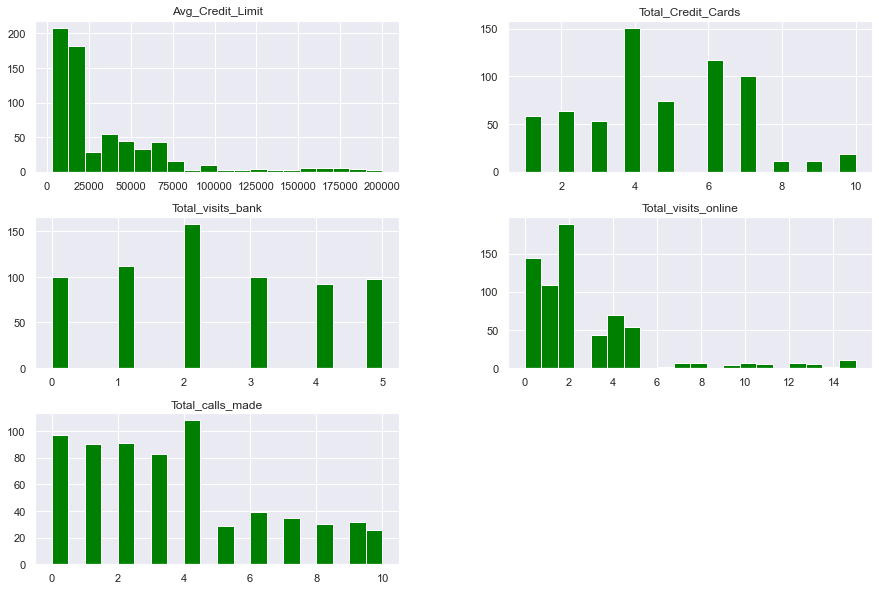

In [11]:
# Plot all the variables
bank_data.hist(bins=20, figsize=(15,10), color='green')
plt.show()

## Insights: 


 
   
1. <span style='background:yellow'>*There are no null values in the dataset and all the variables are of type integer.*</span>
    
2. <span style='background:yellow'>*There are no duplicates*</span>
3. <span style='background:yellow'>*Close to half of the customers have credit limit below $25000*</span>
4. <span style='background:yellow'>*Having 4 credit cards is most common amongst the customers*</span>
5. <span style='background:yellow'>*0-2 online vissits are common*</span>
6. <span style='background:yellow'>*Close to three forth of the customers make 0-4 calls*</span>

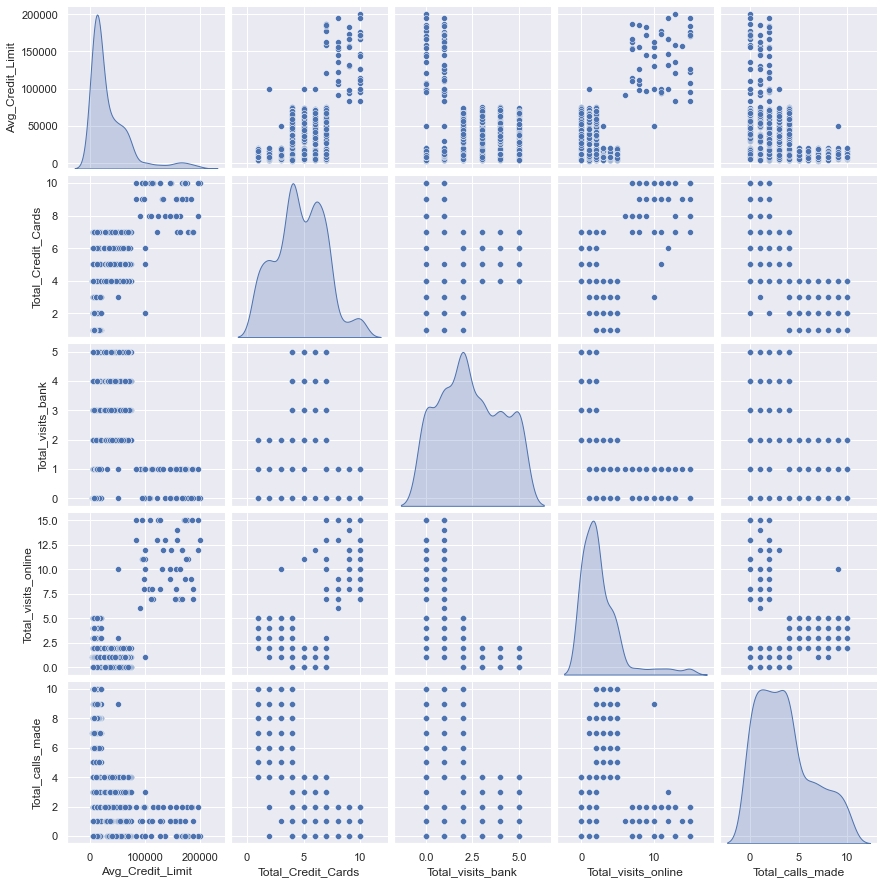

In [12]:
sns.pairplot(bank_data, diag_kind = 'kde');

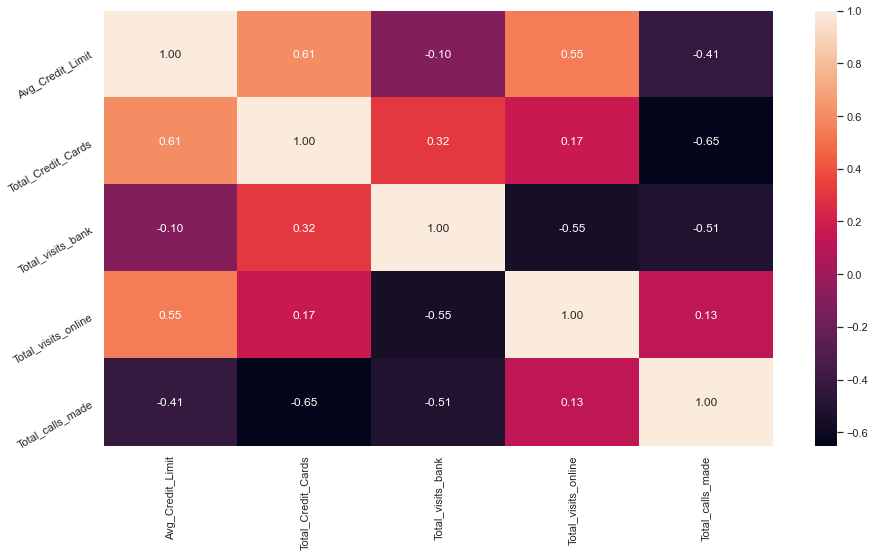

In [13]:
corr = bank_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,8))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Insights:


1. <span style='background:yellow'>*People with most credit limit (100000 to 200000) make 2 or less calls (there is a negetive correlation)*</span>
2. <span style='background:yellow'>*There is a positive correlation between avg_credit_limit and total_credit_cards*</span>
3. <span style='background:yellow'>*There is a positive correlation between Total_visits_online and avg_credit_limit*</span>
4. <span style='background:yellow'>*There is some negetive correlation between Total_visits_bank and Total_calls_made. Which can be understood as people who visit bank don't call much.*</span>
5. <span style='background:yellow'>*There is also negetive correlation betweentotal_credit_cards and total_calls_made*</span>
6. <span style='background:yellow'>*Also, people who visit online tend to visit bank less. Negetive correlation between Total_visits_bank and Total_visits_online*</span>
7. <span style='background:yellow'>*Based on kde plots, we can work with 4 to 5 clusters*</span>
    
    

In [14]:
# Since there is high negetive correlation total_credit_cards and Total_calls_made we can drop one
bank_data.drop('Total_calls_made', axis=1, inplace=True)

In [15]:
# Now lets scale the data
from scipy.stats import zscore
bank_data_z = bank_data.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

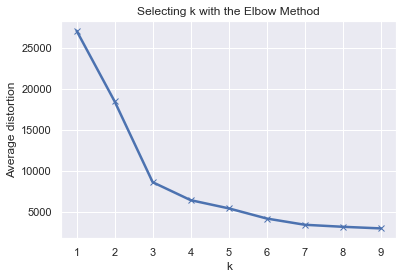

In [16]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(bank_data)
    prediction=model.predict(bank_data)
    meanDistortions.append(sum(np.min(cdist(bank_data, model.cluster_centers_, 'euclidean'), axis=1)) / bank_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [17]:
#Set the value of k=6
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [18]:
kmeans.fit(bank_data_z)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [19]:
centroids = kmeans.cluster_centers_

In [20]:
centroids

array([[-0.20224113,  0.35022071,  1.33292777, -0.53345306],
       [-0.61001981, -1.4724767 , -0.90569261,  0.31591155],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942],
       [-0.42754087,  0.45972956,  0.06536651, -0.57371199],
       [-0.57357832, -0.55676535, -0.87202195,  0.31116671],
       [ 0.67109959,  0.35369055,  0.22982519, -0.57905357]])

In [21]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(bank_data_z) )


In [22]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.202241            0.350221           1.332928   
1         -0.610020           -1.472477          -0.905693   
2          2.831764            1.862226          -1.105763   
3         -0.427541            0.459730           0.065367   
4         -0.573578           -0.556765          -0.872022   
5          0.671100            0.353691           0.229825   

   Total_visits_online  
0            -0.533453  
1             0.315912  
2             2.827319  
3            -0.573712  
4             0.311167  
5            -0.579054  


In [23]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
# Joining the label dataframe with the data frame.
df_labeled = bank_data_z.join(df_labels)

In [25]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,labels
0,1.740187,-1.249225,-0.860451,-0.547490,5
1,0.410293,-0.787585,-1.473731,2.520519,4
2,0.410293,1.058973,-0.860451,0.134290,5
3,-0.121665,0.135694,-0.860451,-0.547490,3
4,1.740187,0.597334,-1.473731,3.202298,2
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,2
656,1.314621,2.443892,-0.860451,3.543188,2
657,2.937092,1.520613,-0.860451,2.179629,2
658,3.655235,2.443892,-0.860451,4.224968,2


In [26]:
# Lets find how many data points are there in each cluster
df_labeled['labels'].value_counts()  

0    170
1    122
5    108
4    106
3    104
2     50
Name: labels, dtype: int64

In [27]:
# Let us try with K = 5 (to demonstrate the 3d plot)
final_model=KMeans(5)
final_model.fit(bank_data_z)
prediction=final_model.predict(bank_data_z)

#Append the prediction 
bank_data_z["GROUP"] = prediction
print("Groups Assigned : \n")
bank_data_z[["Total_visits_online", "GROUP"]]

Groups Assigned : 



,Total_visits_online,GROUP
0,-0.547490,0
1,2.520519,1
2,0.134290,0
3,-0.547490,2
4,3.202298,3
...,...,...
655,2.520519,3
656,3.543188,3
657,2.179629,3
658,4.224968,3


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

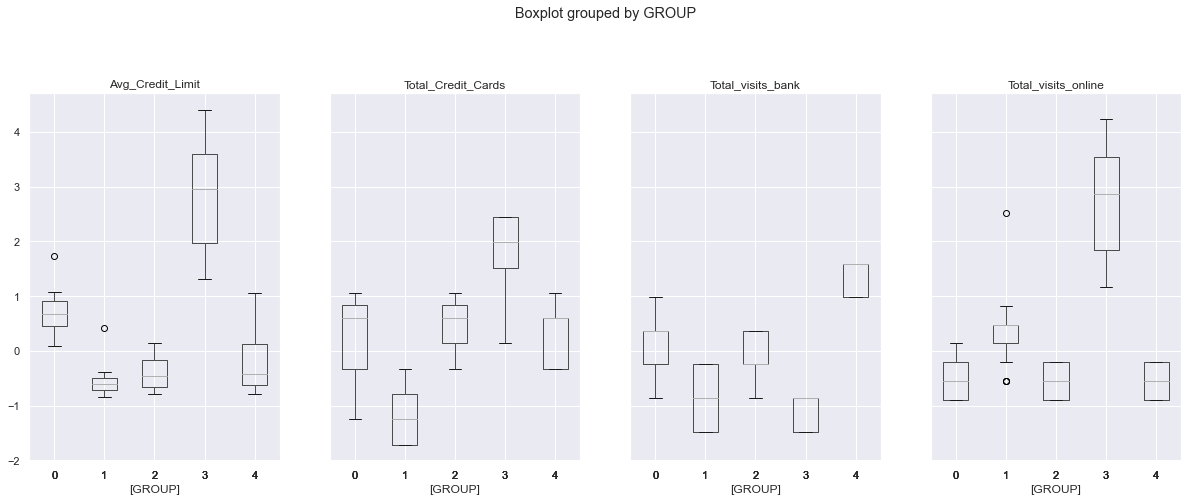

In [28]:
bank_data_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

## Insights:

1. <span style='background:yellow'>*The difference in the mean of credit card limits is clear*</span>
2. <span style='background:yellow'>*The groups also vary much in terms of online visits and bank visits*</span>
3. <span style='background:yellow'>*The group 2 has most average total_credit_cards*</span>
3. <span style='background:yellow'>*The group 2 also has most average total_cicits_online and ave_credit_limit*</span>

In [29]:
# HierarchialClustering

# lets use the unscaled dataset that we had earlier and then scale it as we have added the group column already in the data we scaled earlier

from scipy.stats import zscore
bank_data_z1 = bank_data.apply(zscore)


In [30]:
#Use ward as linkage metric and distance as Eucledian
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(bank_data_z1, 'ward', metric='euclidean')
Z.shape


(659, 4)

In [31]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 521.        ,  574.        ,    0.        ,    2.        ],
       [ 414.        ,  579.        ,    0.        ,    2.        ],
       ...,
       [1314.        , 1315.        ,   17.32166907,  393.        ],
       [1313.        , 1316.        ,   39.61474391,  609.        ],
       [1312.        , 1317.        ,   47.28654638,  660.        ]])

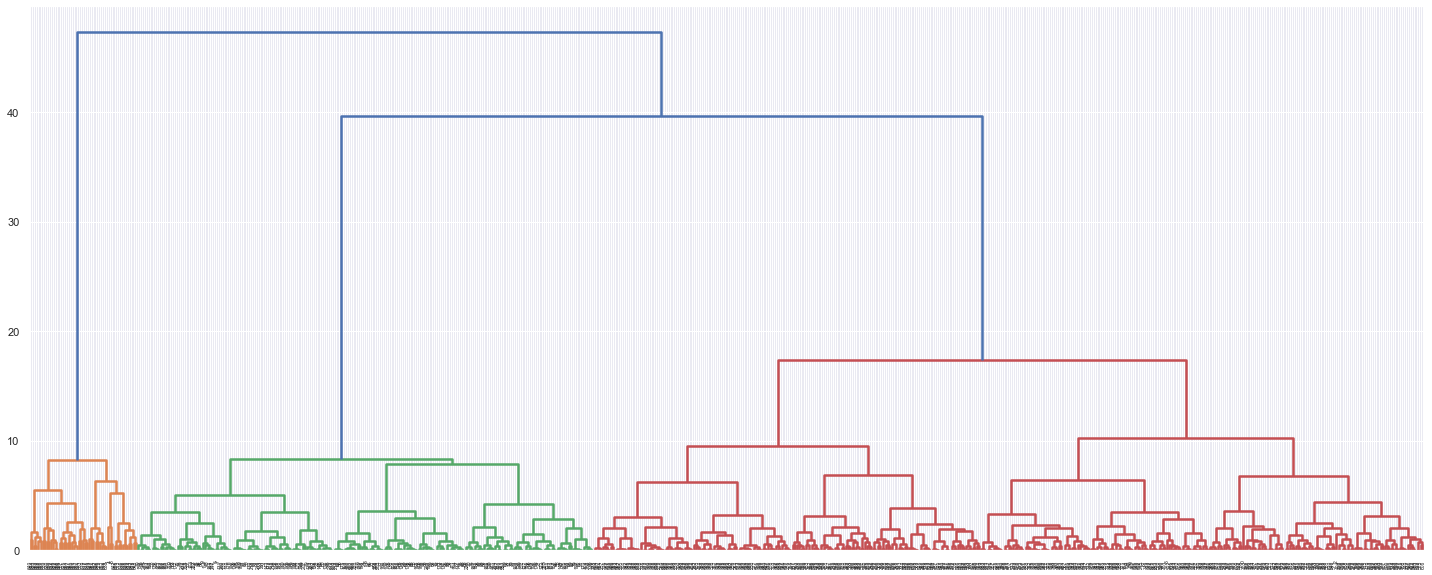

In [32]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

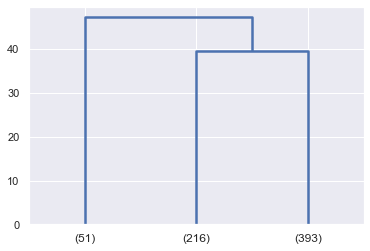

In [33]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [34]:
max_d=40

In [35]:
# Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups¶
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [36]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(bank_data_z1,clusters)

0.6221965214548735

In [37]:
# Silhouette Score is better when closer 1 and worse when closer to -1
# so this looks good
S_Score_ward = pd.DataFrame({'Linkage': ['Ward'], 'Silhouette Score':  [silhouette_score(bank_data_z1,clusters)]})

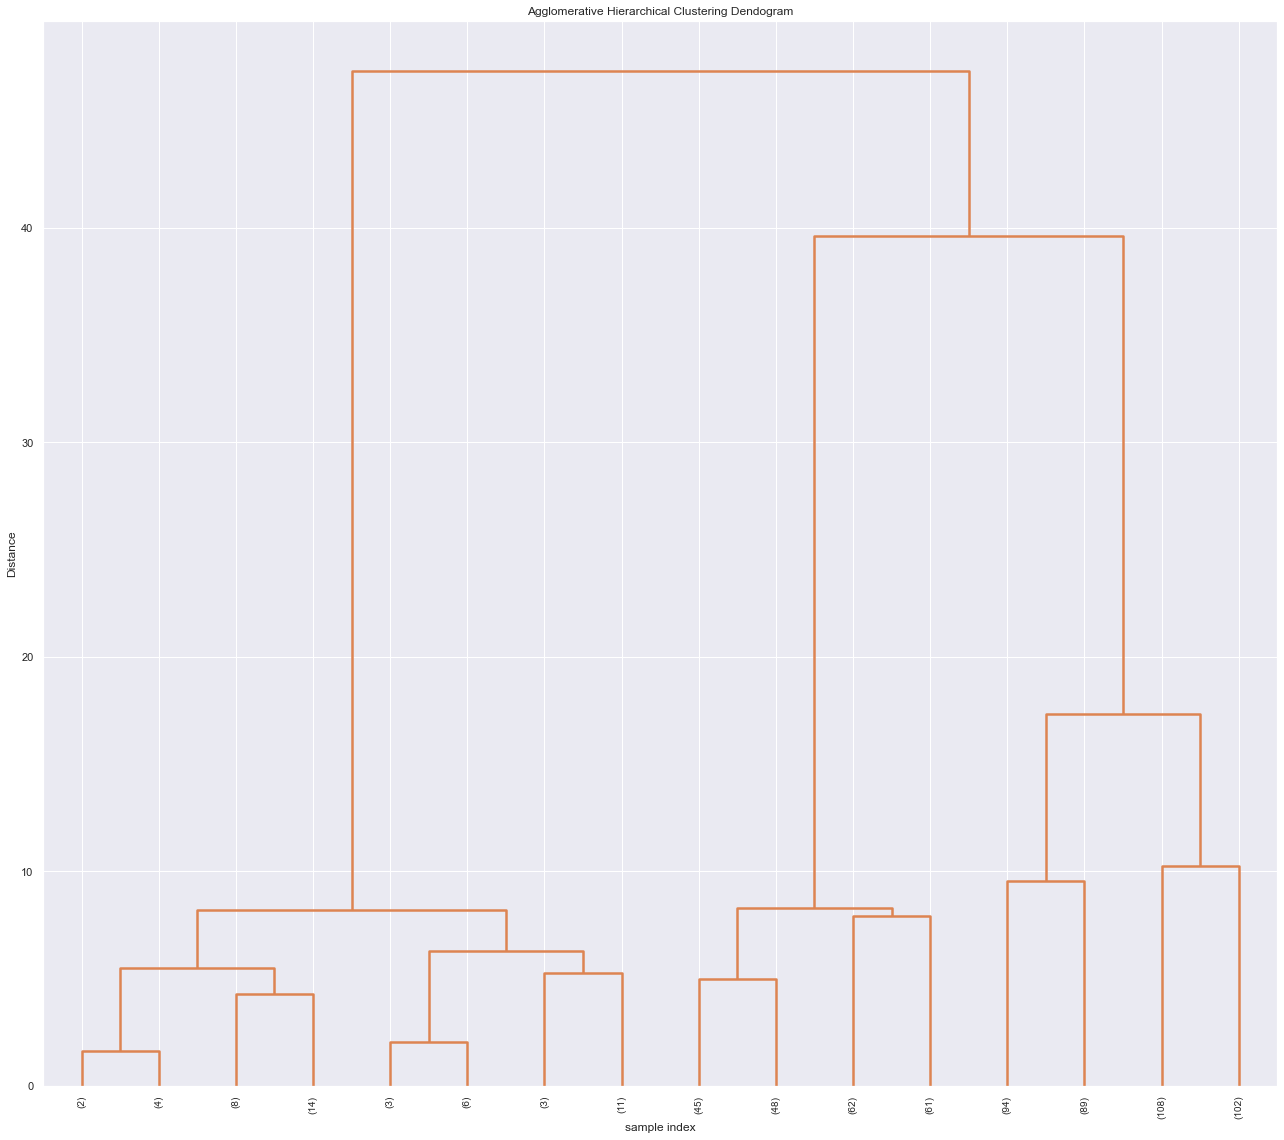

In [38]:
# Final dendogram with 'ward linkage'
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(bank_data_z1, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [39]:
# Now lets use average linkage and calculate the silhoute score
from scipy.cluster.hierarchy import dendrogram, linkage
Y = linkage(bank_data_z1, 'complete', metric='euclidean')
Y.shape


(659, 4)

In [40]:
Y[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 414.        ,  579.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       ...,
       [1311.        , 1313.        ,    4.76438758,  609.        ],
       [1304.        , 1315.        ,    5.23506139,   51.        ],
       [1316.        , 1317.        ,    8.03105017,  660.        ]])

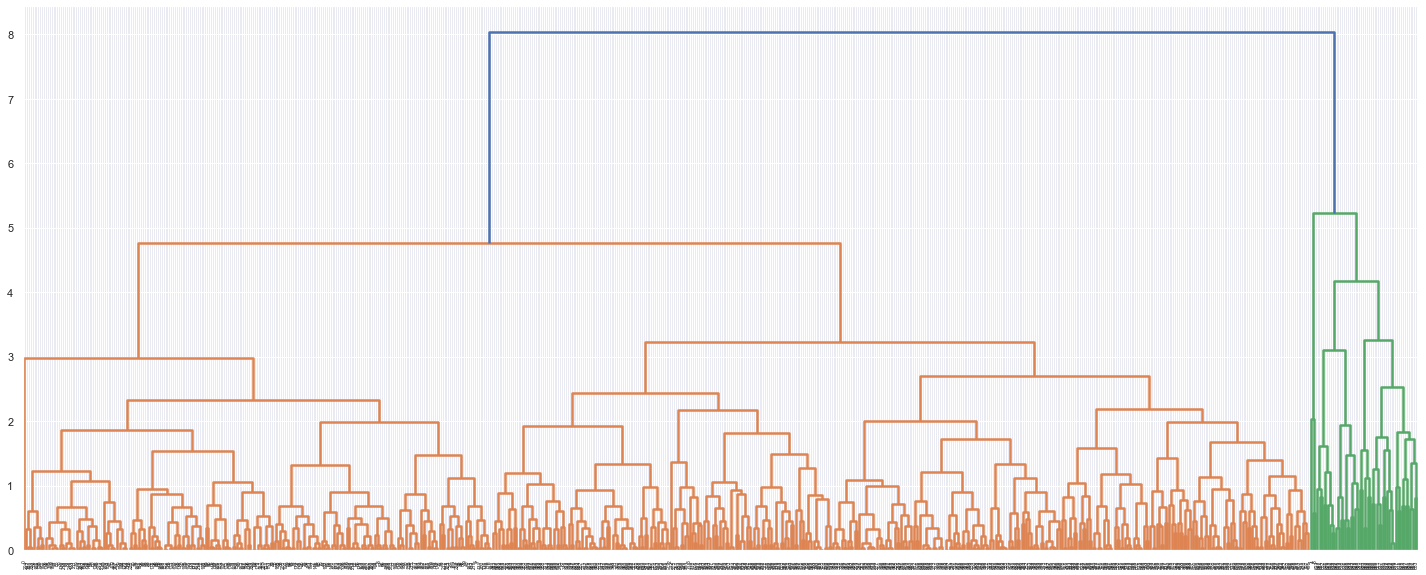

In [41]:
plt.figure(figsize=(25, 10))
dendrogram(Y)
plt.show()


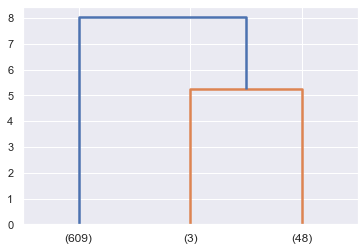

In [42]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Y,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [43]:
max_d1=5

In [44]:
# Use this distance measure(max_d) and fcluster function to cluster the data into 5 different groups¶
from scipy.cluster.hierarchy import fcluster
clusters_comp = fcluster(Y, max_d1, criterion='distance')
clusters_comp

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(bank_data_z1,clusters_comp)

0.497753751417808

In [46]:
# Silhouette Score is better when closer 1 and worse when closer to -1
# so this looks good
S_Score_complete = pd.DataFrame({'Linkage': ['Complete'], 'Silhouette Score': [silhouette_score(bank_data_z1,clusters_comp)]})


In [47]:
Final_frames = [S_Score_complete,S_Score_ward]
result =  pd.concat(Final_frames)
result

,Linkage,Silhouette Score
0,Complete,0.497754
0,Ward,0.622197


## Insights:

1. <span style='background:yellow'>*Here ward method is clearly producing better clusters*</span>
2. <span style='background:yellow'>*The k Mean suggested 5 clusters and also with hierarical clustering we are getting good results with 5 clusters*</span>
3. <span style='background:yellow'>*There ate five different segments the customers can be group in*</span>
4. <span style='background:yellow'>*The difference in the mean of credit card limits is clear*</span>
5. <span style='background:yellow'>*The segments also vary much in terms of online visits and bank visits*</span>
6. <span style='background:yellow'>*The group 2 (from box plot in K mean) has most average total_credit_cards*</span>
7. <span style='background:yellow'>*The group 2 (from box plot in K mean) also has most average total_cicits_online and ave_credit_limit*</span>
